## 0 Importing Required Packages

In [12]:
# packages for dowloading the dataset
import os
import tarfile
import urllib

# packages for data manipulation
import pandas as pd
import numpy as np

# packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize":(20, 12)})

## 1 Get the Data

### 1.1 Download the data

The first and foremost step is to fetch the dataset. So we will write a function that get the required housing prices dataset from the https://github.com/ageron/handson-ml2.

In [3]:
# defining the path
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# function to fetch the dataset
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

# function calling the abvove function
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
fetch_housing_data()

### 1.2 Take a Quick look at Data

In [5]:
# fetching the dataset into a dataframe
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


From above, we get to know that there are 20640 instances in the dataset with 10 attributes.

`total_bedrooms` has 20433 non-null values, so we will have to deal with the empty rows. Moreover, `ocean_proximity` is categorical value and the rest are numerical fields.

Let's have a look at `ocean_proximity` and get what categories exist and how many instances of each cateogry exists.

In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Summarizing the numeric attributes to better understand the data.

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Plotting the numerical part of dataset to get the better feel of the type of data that we are dealing with.

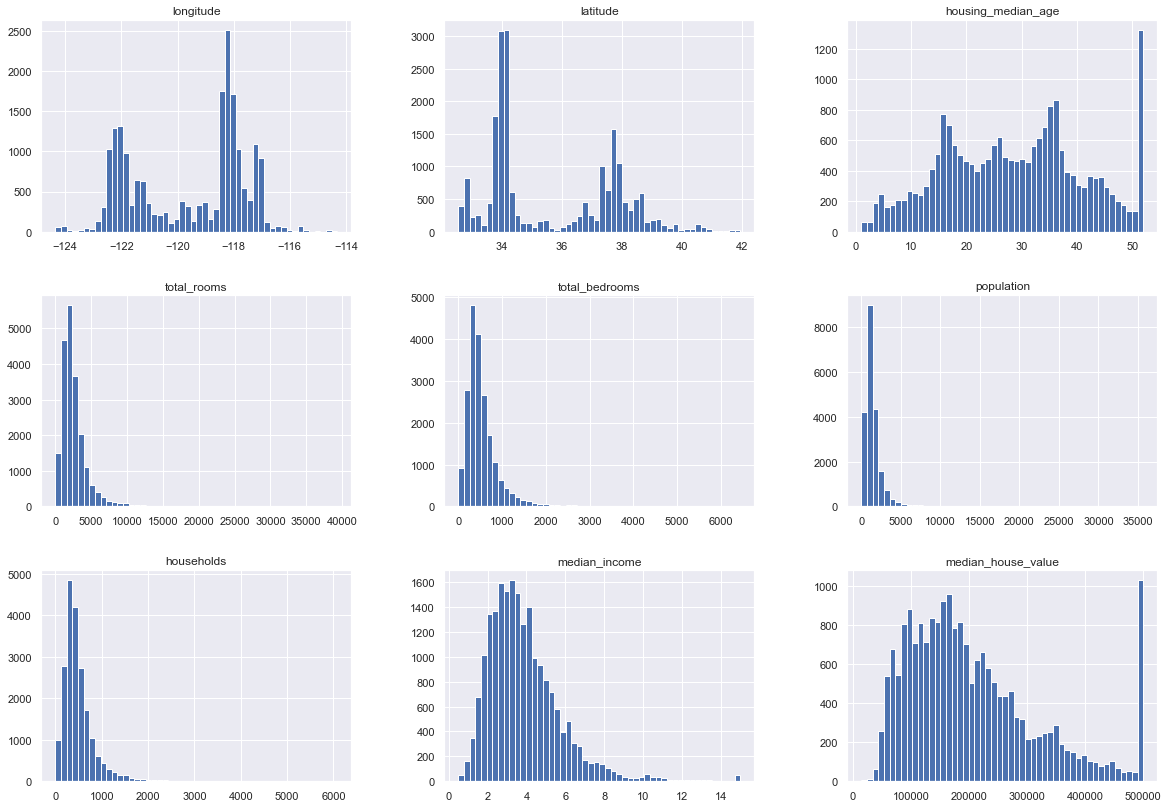

In [10]:
# plotting histogram
housing.hist(bins=50)
plt.show()

The above histograms tells us that - 
1. The attribute `median_income` doesn't look like is in USD format. Upon further investigation, we found that the data are represented in tens of thousands of dollars (for instance, 5 means $50,000). Moreover this attribute is capped between 0.5 for lower values(0.4999) and 15 for larger values (15.001). 
2. All these variables are different scales, so we will have to perform feature scaling.
3.  `housing_median_age` and `median_house_value` are also capped. The latter can create a problem for us as ML model will infer that highest house prices are $500,000 and will not cost boeyond this value. Howver, in ideal situation this is not true. So we might have to get the proper labels for capped rows or we should remove these instance from the data since we dont don't want the model to learn wrong information.
4. Finally, many histograms are tail heavy. This makes if difficult for ML models to detect these patterns, so we might have to transform these attributes as well.

## 2 Discover and Visualize the Data to gain Insights

### 2.1 Visualizing Geographical Data

Since there is geographical information present in the dataset, plotting a scatterplot to get a better idea of the dataset.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

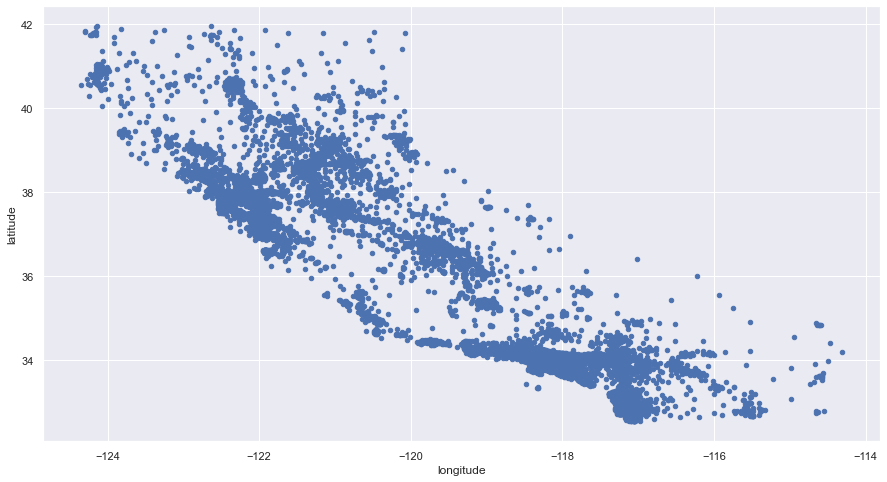

In [17]:
# plotting scatter plot
housing.plot(kind = 'scatter', x = 'longitude', y='latitude', figsize = (15,8))

By eyeballing this graph, we can guess that it looks like the map of California, but other than that there is nothing much to be infered from this visual.

Setting the alpha = 0.1 to make it easier to visualize the places with high density of data points.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

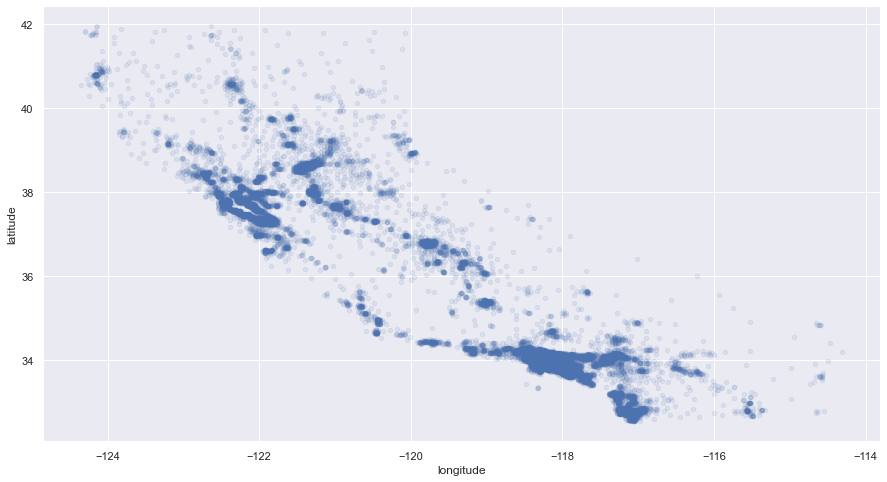

In [16]:
# plotting scatter plot with density
housing.plot(kind = 'scatter', x='longitude', y='latitude', alpha = 0.1, figsize=(15,8))

From above visual we can spot the high density areas, namely the Bay Area and around Los Angeles and San Diego. Moreover, a long line of fairly high density is present around the Central Valley, specifically in Sacremento and Fresno.

Now let's look at the housing prices at these locations.

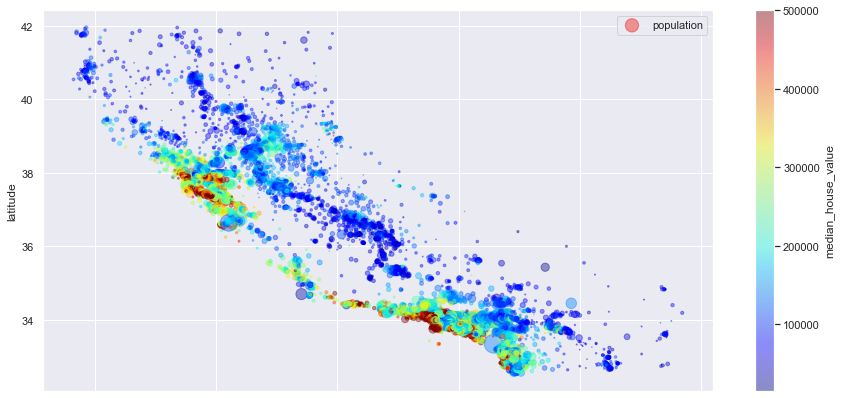

In [19]:
# plotting heatmap on scatter plt
housing.plot(kind='scatter', x = 'longitude', y='latitude', alpha = 0.4, s = housing['population']/100, label='population', figsize = (15,7), c = 'median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

From above visual we  can see that the prices are high near the ocean but is not as high as we go into the inner parts of California and it is also related to the population density.